In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("figures.mplstyle")
from matplotlib.colors import LogNorm

from src.helper_functions import *
from src.constants import *

d = 5e-7 # GeV^-1

In [2]:
N = 100
mN_range = np.linspace(1e-4,0.99*m_mu,N) # HNL mass range from 1 MeV to 100 MeV
U2_range = np.logspace(-10,-2,N) # Mixing parameter squared range
Events_mu = np.zeros((N,N))
Events_e = np.zeros((N,N))
for im,mN in enumerate(mN_range):
    print(f"Calculating for mN = {mN:.3f} GeV")
    passing_fraction_mu = get_frac_events_within_transverse_displacement(E_muon,mN,det_radius=det_radius,N_rand=1e3,mixing="mu")
    passing_fraction_e = get_frac_events_within_transverse_displacement(E_muon,mN,det_radius=det_radius,N_rand=1e3,mixing="e")
    for iu,U2 in enumerate(U2_range):
        Events_mu[im,iu] = expected_HNL_events(mN, U2, 0, d) * passing_fraction_mu
        Events_e[im,iu] = expected_HNL_events(mN, 0, U2, d) * passing_fraction_e

Calculating for mN = 0.000 GeV
Calculating for mN = 0.001 GeV
Calculating for mN = 0.002 GeV
Calculating for mN = 0.003 GeV
Calculating for mN = 0.004 GeV
Calculating for mN = 0.005 GeV
Calculating for mN = 0.006 GeV
Calculating for mN = 0.007 GeV
Calculating for mN = 0.009 GeV
Calculating for mN = 0.010 GeV
Calculating for mN = 0.011 GeV
Calculating for mN = 0.012 GeV
Calculating for mN = 0.013 GeV
Calculating for mN = 0.014 GeV
Calculating for mN = 0.015 GeV
Calculating for mN = 0.016 GeV
Calculating for mN = 0.017 GeV
Calculating for mN = 0.018 GeV
Calculating for mN = 0.019 GeV
Calculating for mN = 0.020 GeV
Calculating for mN = 0.021 GeV
Calculating for mN = 0.022 GeV
Calculating for mN = 0.023 GeV
Calculating for mN = 0.024 GeV
Calculating for mN = 0.025 GeV
Calculating for mN = 0.026 GeV
Calculating for mN = 0.028 GeV
Calculating for mN = 0.029 GeV
Calculating for mN = 0.030 GeV
Calculating for mN = 0.031 GeV
Calculating for mN = 0.032 GeV
Calculating for mN = 0.033 GeV
Calculat

In [6]:
Events_mu

array([[ 1.70681661e-20,  2.47629866e-20,  3.59268536e-20, ...,
         8.10876170e-05,  1.17644248e-04,  1.70681661e-04],
       [ 4.66047826e+00,  5.61356256e+00,  6.76155598e+00, ...,
         3.21228881e+08,  3.86921372e+08,  4.66048232e+08],
       [-3.78239493e+01, -4.55590809e+01, -5.48760742e+01, ...,
        -2.60704859e+09, -3.14019691e+09, -3.78237489e+09],
       ...,
       [ 2.34588545e+02,  2.82562733e+02,  3.40347812e+02, ...,
         1.61790630e+10,  1.94901488e+10,  2.34794500e+10],
       [ 3.24696120e+01,  3.91097626e+01,  4.71078475e+01, ...,
         2.23938276e+09,  2.69768398e+09,  3.24986249e+09],
       [ 1.06763983e+00,  1.28597596e+00,  1.54896259e+00, ...,
         7.36343915e+07,  8.87042456e+07,  1.06861060e+08]])

/tmp/ipykernel_2663103/4123308536.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


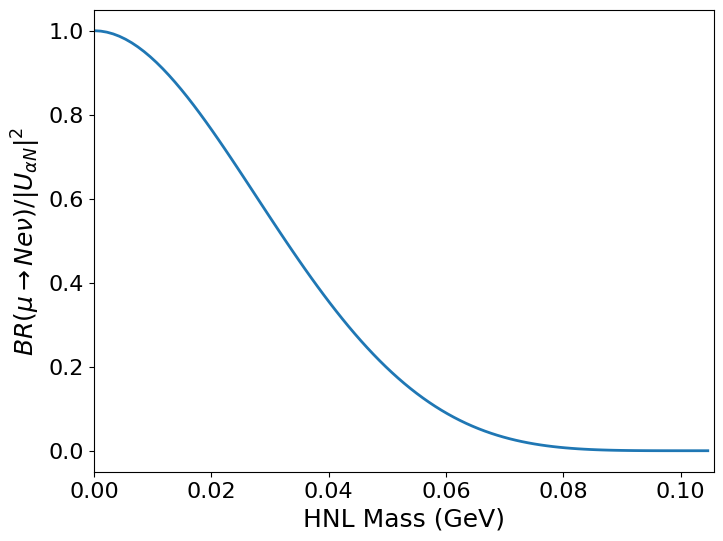

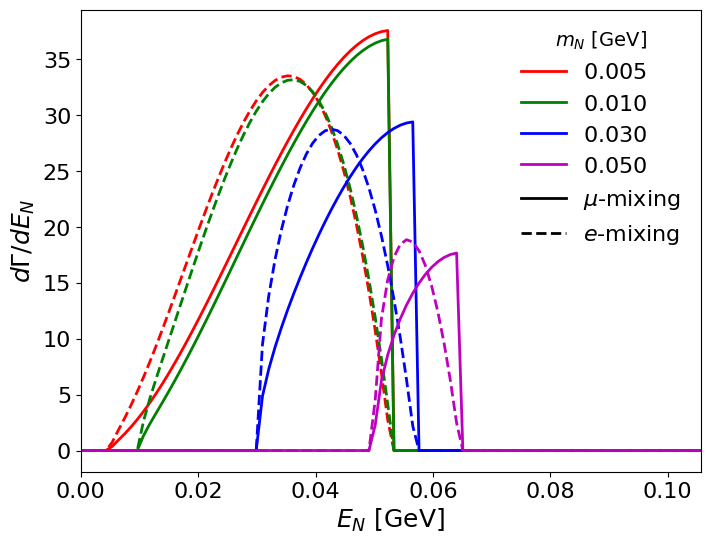

In [7]:
# muon decay width plots
muon_decay_width_SM = muon_total_decay_width(0.0, 1, 0)
muon_decay_width_HNL = {"e":{}, "mu":{}}
for mN in mN_range:
    muon_decay_width_HNL["mu"][mN] = muon_total_decay_width(mN, 1, 0)
    muon_decay_width_HNL["e"][mN] = muon_total_decay_width(mN, 0, 1)
plt.plot(mN_range,[muon_decay_width_HNL["mu"][mN]/muon_decay_width_SM for mN in mN_range])#,label=r"$\mu$")
#plt.plot(mN_range,[muon_decay_width_HNL["e"][mN]/muon_decay_width_SM for mN in mN_range],label=r"$e$")
#plt.semilogy()
plt.xlim(0, m_mu)
plt.xlabel("HNL Mass (GeV)")
plt.ylabel(r"$BR(\mu \to N e \nu)/|U_{\alpha N}|^2$")
plt.legend()
plt.show()

E_N_range = np.linspace(0,m_mu,100)
for mN,color in zip([5e-3,1e-2,3e-2,5e-2],["r","g","b","m"]):
    plt.plot(E_N_range,muon_differential_decay_width(E_N_range,mN,1,0)/Gamma_muon,color=color,label=r"$%1.3f$"%mN)
    plt.plot(E_N_range,muon_differential_decay_width(E_N_range,mN,0,1)/Gamma_muon,color=color,ls="--")
plt.plot([],[],color="k",label=r"$\mu$-mixing")
plt.plot([],[],color="k",ls="--",label=r"$e$-mixing")
plt.xlim(E_N_range[0], E_N_range[-1])
plt.legend(title=r"$m_N$ [GeV]")
plt.xlabel(r"$E_N$ [GeV]")
plt.ylabel(r"$d\Gamma/d E_N$")
plt.show()


In [8]:
# HNL decay width plots
HNL_total_decay_width = HNL_decay_width(mN_range,1,d)
HNL_total_decay_width_approx = HNL_decay_width_approx(mN_range,1)
HNL_ee_decay_width_dict = {
    "e":HNL_ee_decay_width(mN_range, 0, 1),
    "mu":HNL_ee_decay_width(mN_range, 1, 0)
    }

HNL_ee_BR = {
    "e":HNL_ee_decay_width_dict["e"]/HNL_total_decay_width,
    "mu":HNL_ee_decay_width_dict["mu"]/HNL_total_decay_width
    }

fig,ax = plt.subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[3,1]})
ax[0].plot(mN_range,HNL_total_decay_width,label=r"$\Gamma_{\rm tot}$",color="black",ls="-")
#plt.plot(mN_range,HNL_total_decay_width_approx,label=r"$\Gamma_{\rm tot}$",color="black",ls="--")
for flav,color in zip(["e","mu"],["blue","red"]):
    ax[0].plot(mN_range,HNL_ee_decay_width_dict[flav],
               color=color,
               label=r"$\Gamma_{ee}$ (%s mixing)"%(flav))
    ax[1].plot(mN_range,HNL_ee_BR[flav],color=color)
ax[0].loglog()
ax[1].loglog()
ax[1].set_xlabel("HNL Mass (GeV)")
ax[0].set_ylabel(r"$\Gamma_{N}$ (GeV)")
ax[1].set_ylabel("Branching Ratio")
ax[0].legend()
plt.show()
plt.close(fig)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

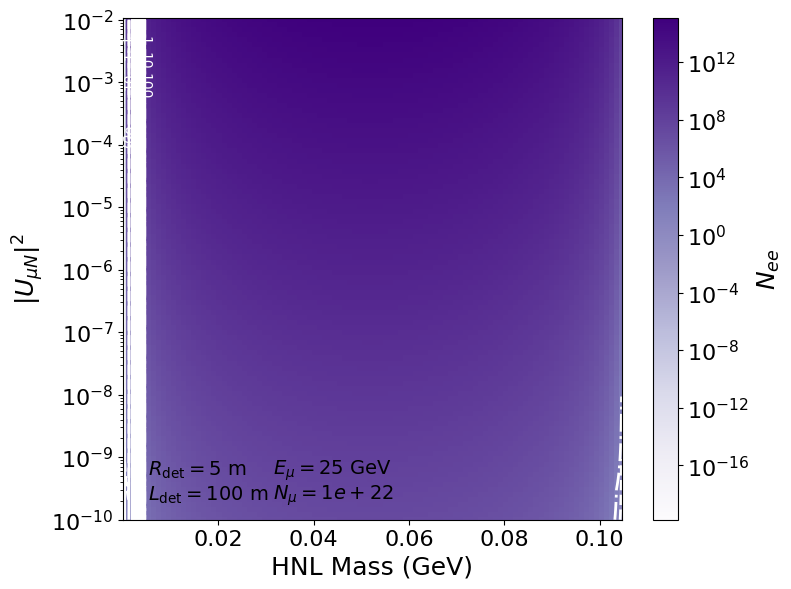

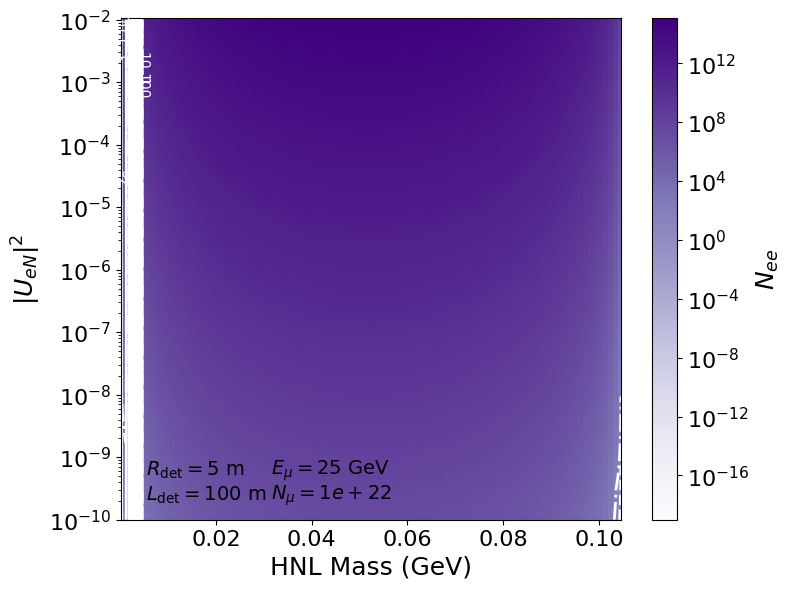

In [9]:
M_mesh,U2_mesh = np.meshgrid(mN_range,U2_range)

plt.pcolormesh(M_mesh, U2_mesh, Events_mu.T, shading='auto', norm=LogNorm())
plt.colorbar(label=r'$N_{ee}$')
CS = plt.contour(M_mesh, U2_mesh, Events_mu.T, levels=[1, 10, 100], colors='white', linestyles=['-', '--', '-.'])
# contour labels
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f')

# save contours
for level,path in enumerate(CS.get_paths()):
    contour_file = open("data/HNL_events_muon_mixing_contour_%d_d_%2.2e.txt"%(level,d), "w")
    v = path.vertices
    for vertex in v:
        contour_file.write(f"{vertex[0]} {vertex[1]}\n")
    contour_file.write("\n")  # separate different segments
contour_file.close()

#plt.xscale('log')
plt.yscale('log')
plt.xlim(mN_range[0], mN_range[-1])
plt.xlabel('HNL Mass (GeV)')
plt.ylabel(r'$|U_{\mu N}|^2$')
plt.text(0.3, 0.1, r'$E_{\mu}=%1.0f$ GeV'%E_muon, transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.text(0.3, 0.05, r'$N_{\mu}= %1.0e$'%N_muon_decays, transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.text(0.05, 0.1, r'$R_{\rm det} = %1.0f$ m'%(det_radius), transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.text(0.05, 0.05, r'$L_{\rm det} = %1.0f$ m'%(det_length), transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.tight_layout()
plt.savefig("Figures/HNL_events_muon_mixin_%2.2e.png"%d,dpi=300)
plt.show()

plt.pcolormesh(M_mesh, U2_mesh, Events_e.T, shading='auto', norm=LogNorm())
plt.colorbar(label=r'$N_{ee}$')
CS = plt.contour(M_mesh, U2_mesh, Events_e.T, levels=[1, 10, 100], colors='white', linestyles=['-', '--', '-.'])
# contour labels
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f')

# save contours
for level,path in enumerate(CS.get_paths()):
    contour_file = open("data/HNL_events_electron_mixing_contour_%d_d_%2.2e.txt"%(level,d), "w")
    v = path.vertices
    for vertex in v:
        contour_file.write(f"{vertex[0]} {vertex[1]}\n")
    contour_file.write("\n")  # separate different segments
contour_file.close()

#plt.xscale('log')
plt.yscale('log')
plt.xlim(mN_range[0], mN_range[-1])
plt.xlabel('HNL Mass (GeV)')
plt.ylabel(r'$|U_{e N}|^2$')
plt.text(0.3, 0.1, r'$E_{\mu}=%1.0f$ GeV'%E_muon, transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.text(0.3, 0.05, r'$N_{\mu}= %1.0e$'%N_muon_decays, transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.text(0.05, 0.1, r'$R_{\rm det} = %1.0f$ m'%(det_radius), transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.text(0.05, 0.05, r'$L_{\rm det} = %1.0f$ m'%(det_length), transform=plt.gca().transAxes,ha='left',va='center',color='black',fontsize=14)
plt.tight_layout()
plt.savefig("Figures/HNL_events_electron_mixing_%2.2e.png"%d,dpi=300)
plt.show()

# Lorentz boost stuff

In [ ]:
mN = 0.1*m_mu
E_muon_range = np.linspace(5, 20, 50)
det_radius_range = np.linspace(0, 10, 50)
fracs= {}
for mN in [0.01*m_mu,0.1*m_mu,0.5*m_mu]:
    for E_muon in E_muon_range:
        for det_radius in det_radius_range:
            fracs[(E_muon, det_radius, mN)] = get_frac_events_within_transverse_displacement(E_muon,mN,det_radius=det_radius,N_rand=4e4,mixing="e")

KeyboardInterrupt: 

In [ ]:
# 2D plot of event fractions

for mN in [0.01*m_mu,0.1*m_mu,0.5*m_mu]:
    E_muon_range_mesh, det_radius_mesh = np.meshgrid(E_muon_range, det_radius_range)
    frac_values = np.array([[fracs[(E_muon, det_radius, mN)] for E_muon in E_muon_range] for det_radius in det_radius_range])
    plt.pcolormesh(E_muon_range_mesh, det_radius_mesh, frac_values, shading='auto', cmap='Purples',vmin=0, vmax=1)
    plt.colorbar(label='Passing Fraction')
    contours = plt.contour(E_muon_range_mesh, det_radius_mesh, frac_values, levels=[0.1, 0.5, 0.9], colors=['black','black','white'], linestyles='--')
    plt.clabel(contours, inline=1, fontsize=10, fmt='%1.1f')
    plt.text(0.95, 0.95, r'$m_N/m_\mu=%1.2f$'%(mN/m_mu), transform=plt.gca().transAxes,ha='right',va='center',color='white',fontsize=14)
    plt.xlabel('Muon Energy (GeV)')
    plt.ylabel('Detector Radius (m)')
    plt.savefig("Figures/frac_events_mN_%1.2fmMu.png"%(mN/m_mu),dpi=300)
    plt.show()